## COVID Vaccination Sentiment Analysis of Reddit posts and comments

(Natural Language Toolkit Library) for analyzing the customer sentiment on the basis of Reddit posts and comments on COVID Vaccination

### Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
from bs4 import BeautifulSoup

### Import the required data

In [3]:
reddit_vaccine = pd.read_csv("reddit_vm.csv")

In [4]:
reddit_vaccine.head(10)

,title,score,id,url,comms_num,created,body,timestamp
0,Health Canada approves AstraZeneca COVID-19 va...,7,lt74vw,https://www.canadaforums.ca/2021/02/health-can...,0,1.614400e+09,NaN,2021-02-27 06:33:45
1,COVID-19 in Canada: 'Vaccination passports' a ...,2,lsh0ij,https://www.canadaforums.ca/2021/02/covid-19-i...,1,1.614316e+09,NaN,2021-02-26 07:11:07
2,Coronavirus variants could fuel Canada's third...,6,lohlle,https://www.canadaforums.ca/2021/02/coronaviru...,0,1.613887e+09,NaN,2021-02-21 07:50:08
3,Canadian government to extend COVID-19 emergen...,1,lnptv8,https://www.canadaforums.ca/2021/02/canadian-g...,0,1.613796e+09,NaN,2021-02-20 06:35:13
4,Canada: Pfizer is 'extremely committed' to mee...,6,lkslm6,https://www.canadaforums.ca/2021/02/canada-pfi...,0,1.613468e+09,NaN,2021-02-16 11:36:28
5,Canada: Oxford-AstraZeneca vaccine approval ex...,5,lftbji,https://www.canadaforums.ca/2021/02/canada-oxf...,0,1.612869e+09,NaN,2021-02-09 13:17:11
6,Comment,1,ej9x066,NaN,0,1.553474e+09,Your OP. It's not a myth. Only one vaccine con...,2019-03-25 02:34:53
7,Fuck you anti-vaxxing retards,10,g6jkhp,https://www.reddit.com/r/VaccineMyths/comments...,8,1.587663e+09,https://youtu.be/zBkVCpbNnkU,2020-04-23 20:23:42
8,Comment,0,fofa0yy,NaN,0,1.587760e+09,Because Anti-Vaxxers have no sense,2020-04-24 23:19:50
9,Comment,0,ej9xuaf,NaN,0,1.553475e+09,"What do you mean by ""your OP"". I am fairly new...",2019-03-25 02:45:21


### Identify null values and remove them

In [5]:
reddit_vaccine.isna().sum()

title           0
score           0
id              0
url          1121
comms_num       0
created         0
body          372
timestamp       0
dtype: int64

In [6]:
reddit_vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1585 entries, 0 to 1584
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1585 non-null   object 
 1   score      1585 non-null   int64  
 2   id         1585 non-null   object 
 3   url        464 non-null    object 
 4   comms_num  1585 non-null   int64  
 5   created    1585 non-null   float64
 6   body       1213 non-null   object 
 7   timestamp  1585 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 99.2+ KB


In [7]:
reddit_vaccine = reddit_vaccine.dropna()

In [8]:
reddit_vaccine

,title,score,id,url,comms_num,created,body,timestamp
7,Fuck you anti-vaxxing retards,10,g6jkhp,https://www.reddit.com/r/VaccineMyths/comments...,8,1.587663e+09,https://youtu.be/zBkVCpbNnkU,2020-04-23 20:23:42
119,Is it biologically possible to insert a 5G tra...,9,khzpug,https://www.reddit.com/r/VaccineMyths/comments...,9,1.608647e+09,Although I don't believe this to be true about...,2020-12-22 16:19:39
134,I don't see any reason to trust J&J with a vac...,0,ocj9ws,https://www.reddit.com/r/VaccineMyths/comments...,4,1.625288e+09,**”…the company knew there was asbestos in pro...,2021-07-03 07:57:05
145,Vaccine Survey,0,ak5ziq,https://www.reddit.com/r/VaccineMyths/comments...,5,1.548543e+09,Hi guys! I was wondering if you could help me ...,2019-01-27 00:42:09
162,Vaccine making your hand magnetic,1,pjqjom,https://www.reddit.com/r/VaccineMyths/comments...,12,1.631032e+09,Ok so a worker at my work took the vaccine. Af...,2021-09-07 19:30:35
...,...,...,...,...,...,...,...,...
429,We should create a list of canned speeches and...,5,26f34p,https://www.reddit.com/r/VaccineMyths/comments...,2,1.400985e+09,I often see rebuttals created that are often h...,2014-05-25 05:24:21
459,My anti-vax aunt just posted this comment on a...,11,238hku,https://www.reddit.com/r/VaccineMyths/comments...,22,1.397700e+09,She's a little bit of a conspiracy nut and is ...,2014-04-17 05:06:08
477,Chili's Fail,2,22bkdv,https://www.reddit.com/r/VaccineMyths/comments...,0,1.396756e+09,I bet the local health departments (who promot...,2014-04-06 06:44:36
535,You are the only person here that knows what y...,3,1y0s0k,https://www.reddit.com/r/VaccineMyths/comments...,5,1.392509e+09,"\n\nI think this guy is probably doing these ""...",2014-02-16 02:11:35


In [9]:
reddit_vaccine['score'].max()

38

In [10]:
reddit_vaccine['score'].min()

0

In [11]:
reddit_vaccine['score'].mean()

6.771739130434782

In [12]:
reddit_vaccine['score'].median()

5.0

### Set up a range for positive, negative and neutral sentiment

In this, we have set 7 as the score for neutral sentiment. 

Once the score is above 7, sentiment is Positive i.e. People support COVID Vaccination 

If the score is below 7, sentiment is Negative i.e. People are against COVID Vaccination (Anti Vaxxers)

In [13]:
a = []

for i in reddit_vaccine['score']:
    if i < 7:
        a.append(0)
    if i == 7:
        a.append(1)
    if i > 7:
        a.append(2)

## Now we will create a barplot to show the count of Positive, Negative and Neutral Sentiment

C:\Users\Ons\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


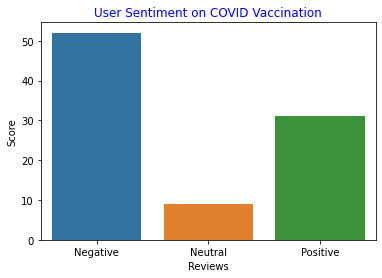

In [14]:
#User sentiment analysis
sns.countplot(a)
plt.xlabel('Reviews', color = 'black')
plt.ylabel('Score', color = 'black')
plt.xticks([0,1,2],['Negative','Neutral','Positive'])
plt.title('User Sentiment on COVID Vaccination', color = 'b')
plt.show()

## Now, we will create a Wordcloud for posts and comments to identify the topic frequently discussed on Reddit 

In [15]:
import plotly.express as px
import plotly.graph_objects as go
import plotly as py
from wordcloud import WordCloud, STOPWORDS

## Reddit Posts

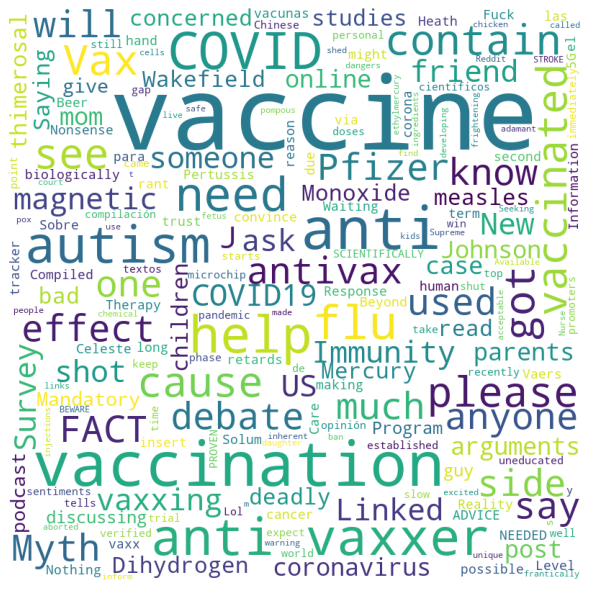

In [16]:
#Text analysis for frequent topics
wordcloud = WordCloud(width = 800, height = 800,stopwords=STOPWORDS, min_font_size=10, background_color ='white').generate(' '.join(i for i in reddit_vaccine['title']))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

## Reddit Comments

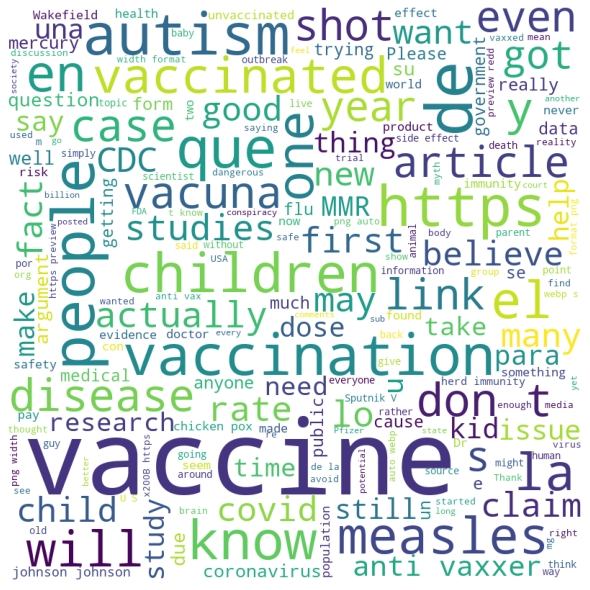

In [17]:
#Text analysis for frequent comments
wordcloud = WordCloud(width = 800, height = 800,stopwords=STOPWORDS, min_font_size=10, background_color ='white').generate(' '.join(i for i in reddit_vaccine['body']))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()